In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/nuwa_cluster/home/jackyu/locally_installed_python_pacakges/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'option_wgt',
            'fac_meank']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03a_wn_540_620',
                          'ng_8',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ng_refs_4__4',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.6__all.6',
                          'bigsum',
                          'option_wgt_1',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03a_wn_540_620',
                          'ng_8',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ng_refs_4__4',
                          'getabsth_auto__auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_all.6__all.6',
                          'bigsum',
                          'option_wgt_1',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 540

nband = 80

nv = 200

dv = 0.005

tsfc = 294.0

ng = 8

nref = 2

p_refs = (/ 1, 500 /)

t_refs = (/ 250, 250 /)

ng_refs = (/ 4,   4 /)

data wgt
     &     /4*.6, 4*.6/

planck_wgt_flux = 2

option_wgt = 1

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

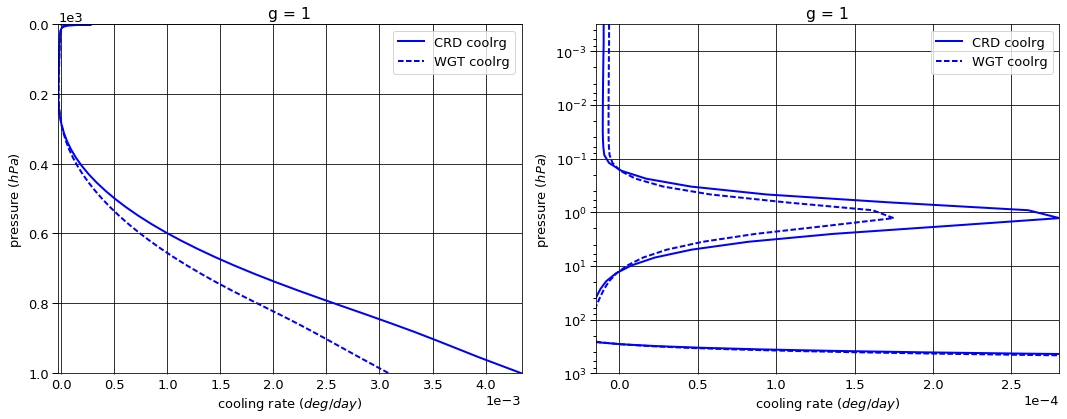

# Figure: cooling rate g-group 2

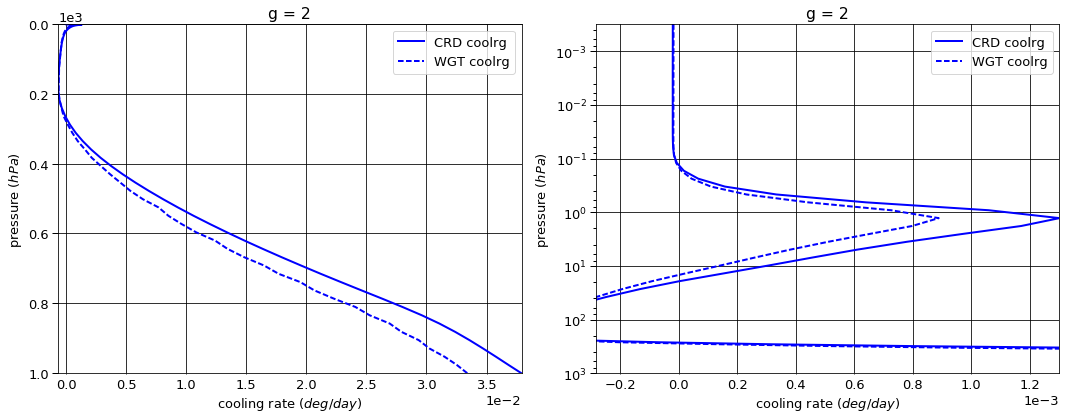

# Figure: cooling rate g-group 3

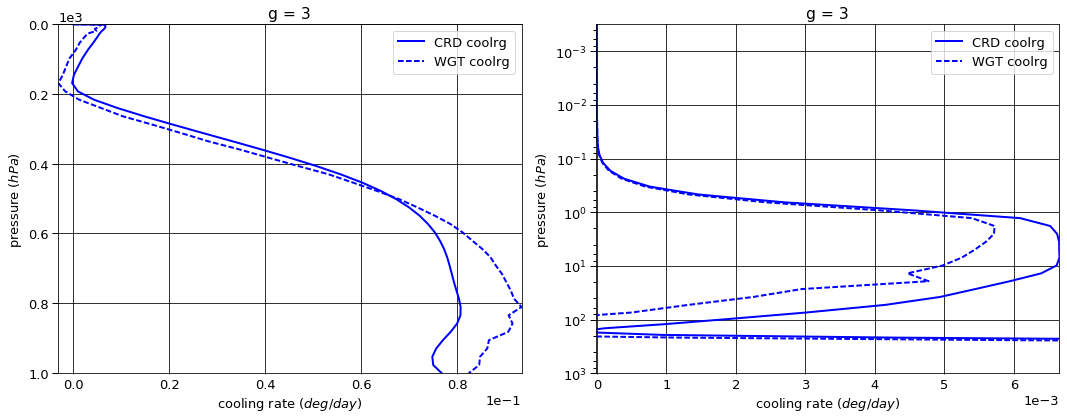

# Figure: cooling rate g-group 4

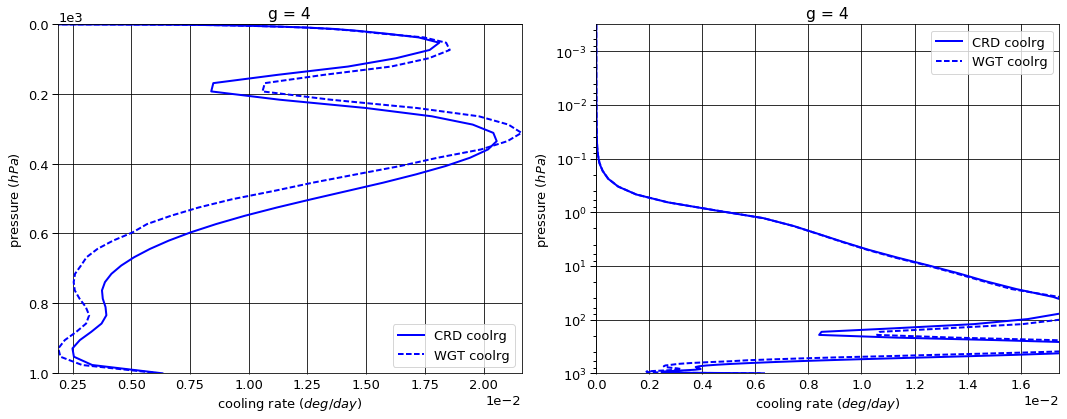

# Figure: cooling rate g-group 5

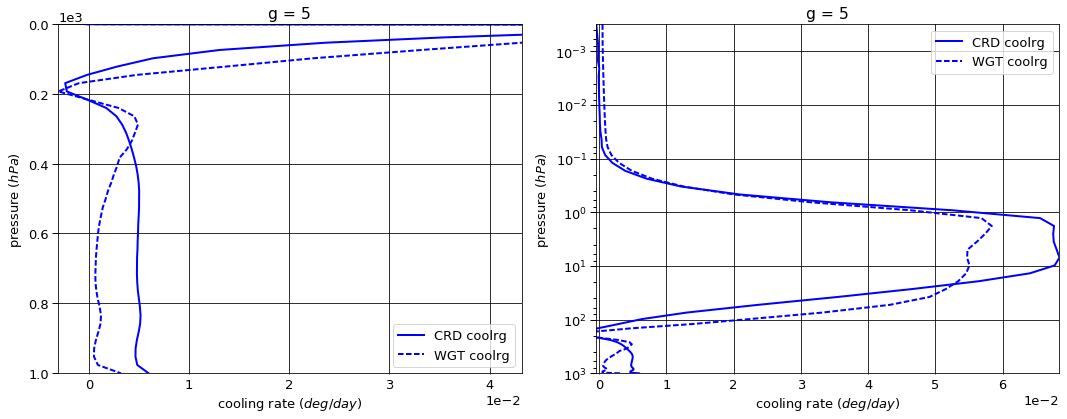

# Figure: cooling rate g-group 6

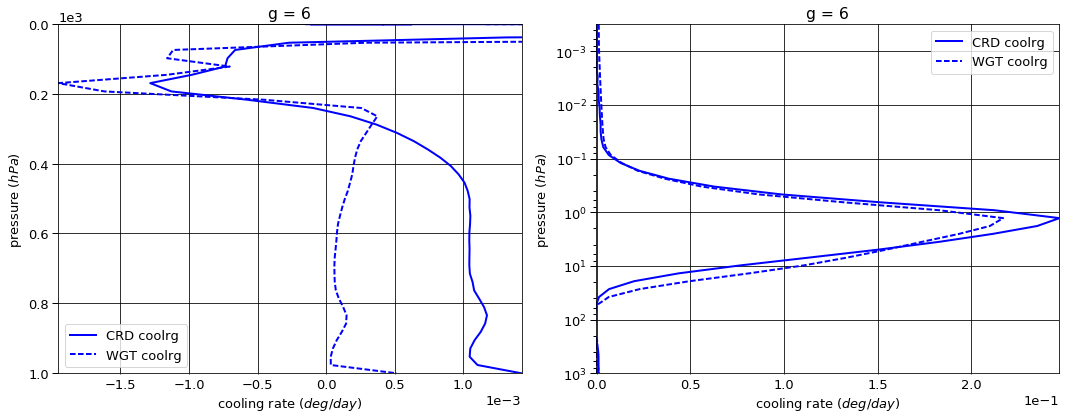

# Figure: cooling rate g-group 7

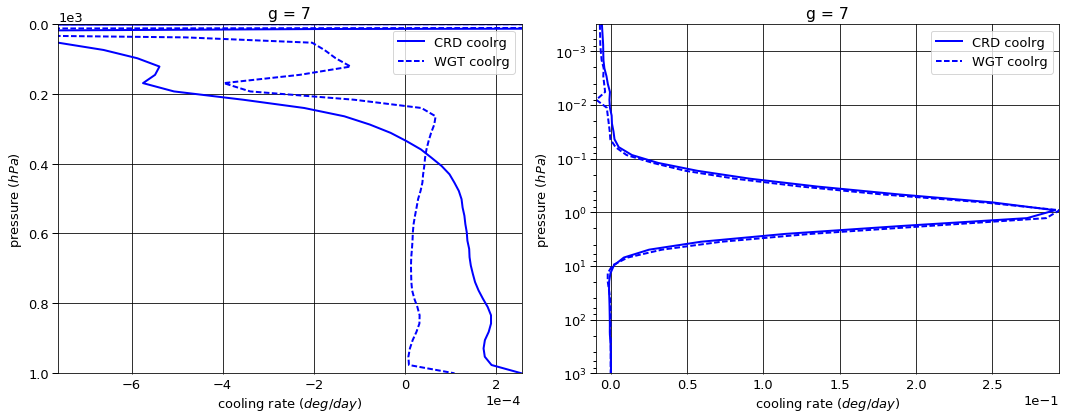

# Figure: cooling rate g-group 8

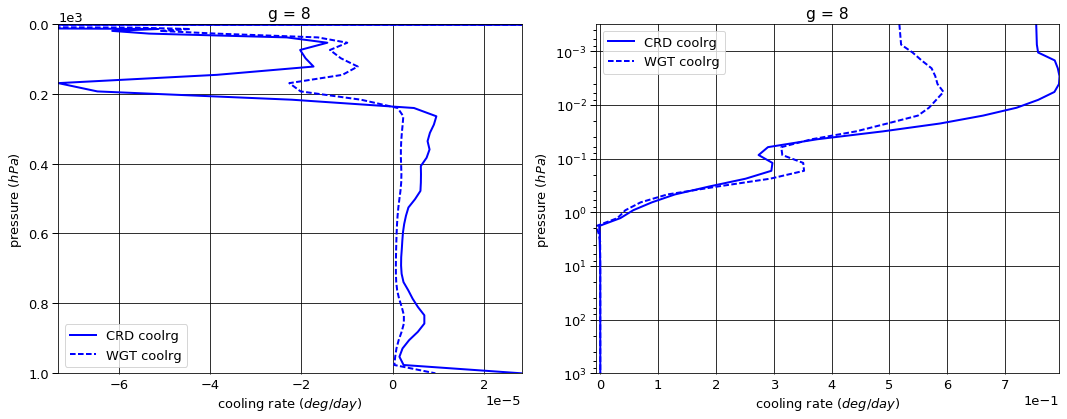

# Figure: cooling rate g-group total

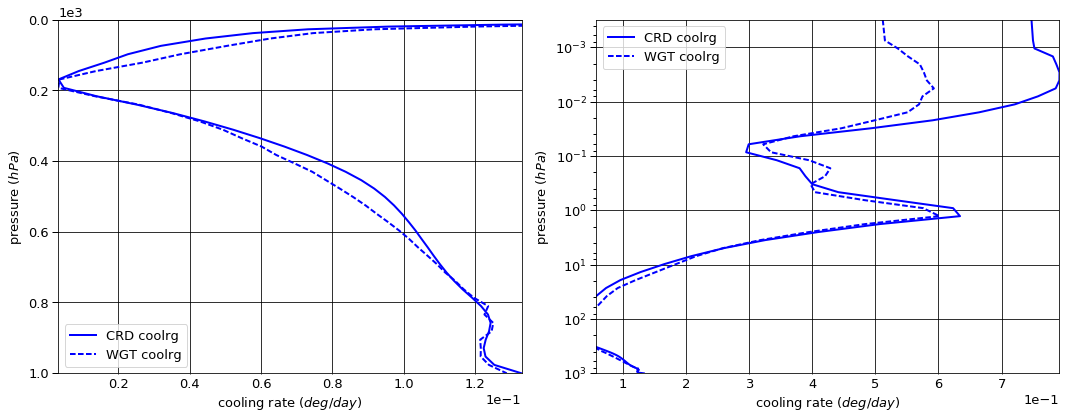

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -8.019615  0.000000  -8.019615
  1013.0   76     -8.045560  0.168614  -7.876946
2 0.0      1     -10.301472  0.000000 -10.301472
  1013.0   76    -10.697850  1.920231  -8.777619
3 0.0      1      -8.486333  0.000000  -8.486333
  1013.0   76    -11.755056  9.268917  -2.486139
4 0.0      1      -1.289525  0.000000  -1.289525
  1013.0   76     -2.961812  2.928574  -0.033239
5 0.0      1      -1.041022  0.000000  -1.041022
  1013.0   76     -1.988443  1.742689  -0.245754
6 0.0      1      -0.346842  0.000000  -0.346842
  1013.0   76     -0.619421  0.573043  -0.046378
7 0.0      1      -0.077861  0.000000  -0.077861
  1013.0   76     -0.119838  0.115754  -0.004084
8 0.0      1      -0.020815  0.000000  -0.020815
  1013.0   76     -0.047427  0.047343  -0.000084


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -8.025887  0.000000  -8.025887
  1013.0   76     -8.045560  0.122433  -7.923127
2 0.0      1     -10.369881  0.000000 -10.369881
  1013.0   76    -10.697850  1.619556  -9.078294
3 0.0      1      -8.463608  0.000000  -8.463608
  1013.0   76    -11.755056  9.632588  -2.122468
4 0.0      1      -1.211219  0.000000  -1.211219
  1013.0   76     -2.961812  2.933694  -0.028119
5 0.0      1      -0.737620  0.000000  -0.737620
  1013.0   76     -1.988443  1.977071  -0.011372
6 0.0      1      -0.303349  0.000000  -0.303349
  1013.0   76     -0.619421  0.617965  -0.001456
7 0.0      1      -0.079953  0.000000  -0.079953
  1013.0   76     -0.119838  0.119526  -0.000312
8 0.0      1      -0.020062  0.000000  -0.020062
  1013.0   76     -0.047427  0.047401  -0.000026


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.006273  0.000000 -0.006273
  1013.0   76     0.000000 -0.046181 -0.046181
2 0.0      1     -0.068409  0.000000 -0.068409
  1013.0   76     0.000000 -0.300675 -0.300675
3 0.0      1      0.022725  0.000000  0.022725
  1013.0   76     0.000000  0.363671  0.363671
4 0.0      1      0.078306  0.000000  0.078306
  1013.0   76     0.000000  0.005120  0.005120
5 0.0      1      0.303401  0.000000  0.303401
  1013.0   76     0.000000  0.234382  0.234382
6 0.0      1      0.043493  0.000000  0.043493
  1013.0   76     0.000000  0.044922  0.044922
7 0.0      1     -0.002092  0.000000 -0.002092
  1013.0   76     0.000000  0.003771  0.003771
8 0.0      1      0.000753  0.000000  0.000753
  1013.0   76     0.000000  0.000058  0.000058

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000010
  1001.112500 75     0.004340
2 0.000312    1     -0.000020
  1001.112500 75     0.037915
3 0.000312    1     -0.000007
  1001.112500 75     0.076801
4 0.000312    1      0.000005
  1001.112500 75     0.006325
5 0.000312    1     -0.000404
  1001.112500 75     0.005954
6 0.000312    1     -0.000145
  1001.112500 75     0.001424
7 0.000312    1     -0.005751
  1001.112500 75     0.000256
8 0.000312    1      0.753748
  1001.112500 75     0.000028


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000007
  1001.112500 75     0.003089
2 0.000312    1     -0.000017
  1001.112500 75     0.033408
3 0.000312    1     -0.000005
  1001.112500 75     0.082387
4 0.000312    1      0.000006
  1001.112500 75     0.006196
5 0.000312    1      0.000524
  1001.112500 75     0.003184
6 0.000312    1      0.001164
  1001.112500 75     0.000514
7 0.000312    1     -0.007085
  1001.112500 75     0.000109
8 0.000312    1      0.517147
  1001.112500 75     0.000009


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      3.443889e-06
  1001.112500 75    -1.250595e-03
2 0.000312    1      2.473895e-06
  1001.112500 75    -4.507527e-03
3 0.000312    1      1.515333e-06
  1001.112500 75     5.585897e-03
4 0.000312    1      9.653413e-07
  1001.112500 75    -1.291219e-04
5 0.000312    1      9.276554e-04
  1001.112500 75    -2.770110e-03
6 0.000312    1      1.309514e-03
  1001.112500 75    -9.100430e-04
7 0.000312    1     -1.334953e-03
  1001.112500 75    -1.470552e-04
8 0.000312    1     -2.366016e-01
  1001.112500 75    -1.890229e-05

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-29.583484,0.000000,-29.583484
1013.0,76,-36.235407,16.765165,-19.470243



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-29.211580,0.000000,-29.211580
1013.0,76,-36.235407,17.070235,-19.165173



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.371904,0.000000,0.371904
1013.0,76,0.000000,0.305069,0.305069


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.747417
1001.112500,75,0.133043



WGT


,,coolrg
pressure,layer,
0.000312,1,0.511726
1001.112500,75,0.128896



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.235691
1001.112500,75,-0.004147


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.222125,0.226690
2,0.294875,0.297729
3,0.324437,0.320286
4,0.081875,0.080029
5,0.054938,0.053986
6,0.017125,0.016762
7,0.003312,0.003242
8,0.001313,0.001276


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.011442e-25
2,1.809076e-24
3,3.235733e-23
4,5.787469e-22
5,2.315957e-23
6,4.148582e-22
7,7.431371e-21
8,1.331184e-19


In [21]:
def spreadsheet():
    ng = 8
    ng_refs = [4, 4]
    p_refs = [1, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,1.011442e-25,NaN,0.222125,0.226690,0.222125,0.226690,500.0
2,1.809076e-24,NaN,0.294875,0.297729,0.517000,0.524418,500.0
3,3.235733e-23,17.886110,0.324437,0.320286,0.841438,0.844705,500.0
4,5.787469e-22,17.886111,0.081875,0.080029,0.923313,0.924734,500.0
5,2.315957e-23,0.040017,0.054938,0.053986,0.978250,0.978720,1.0
6,4.148582e-22,17.913036,0.017125,0.016762,0.995375,0.995482,1.0
7,7.431371e-21,17.913036,0.003312,0.003242,0.998688,0.998724,1.0
8,1.331184e-19,17.913036,0.001313,0.001276,1.000000,1.000000,1.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# Histogram of wavenumbers in g-group 1

In [24]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [25]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')